### Importación de datos



In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,"164,300.00","6,900.00",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.61,-74.08
1,Mesa de comedor,Muebles,"192,300.00","8,400.00",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25,-75.56
2,Juego de mesa,Juguetes,"209,600.00","15,900.00",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.40,-75.51
3,Microondas,Electrodomésticos,"757,500.00","41,000.00",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.44,-76.52
4,Silla de oficina,Muebles,"335,200.00","20,200.00",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56


#1. Análisis de facturación



In [2]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [3]:
total_tienda1 = tienda['Precio'].sum()
total_tienda2 = tienda2['Precio'].sum()
total_tienda3 = tienda3['Precio'].sum()
total_tienda4 = tienda4['Precio'].sum()

In [4]:
resumen_tiendas = {"Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"], "Total Ventas" : [total_tienda1, total_tienda2, total_tienda3, total_tienda4] }
resumen_tiendas = pd.DataFrame(resumen_tiendas)
resumen_tiendas

,Tienda,Total Ventas
0,Tienda 1,"1,150,880,400.00"
1,Tienda 2,"1,116,343,500.00"
2,Tienda 3,"1,098,019,600.00"
3,Tienda 4,"1,038,375,700.00"


# 2. Ventas por categoría

In [5]:
categorias_tienda1 = tienda.groupby('Categoría del Producto')['Precio'].sum()
categorias_tienda2 = tienda2.groupby('Categoría del Producto')['Precio'].sum()
categorias_tienda3 = tienda3.groupby('Categoría del Producto')['Precio'].sum()
categorias_tienda4 = tienda4.groupby('Categoría del Producto')['Precio'].sum()

<Axes: ylabel='Precio'>

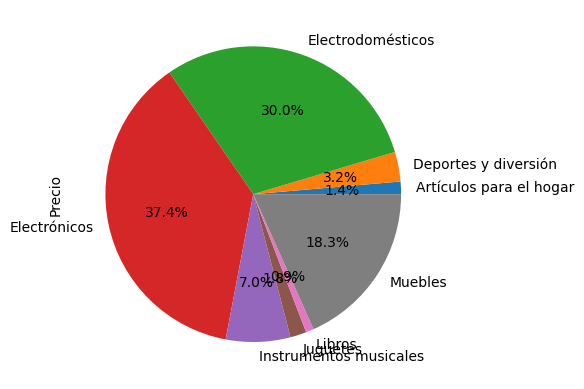

In [6]:
categorias_tienda3.plot(kind='pie', autopct='%1.1f%%')


In [7]:
max_categoria1 = categorias_tienda1.idxmax()
max_categoria2 = categorias_tienda2.idxmax()
max_categoria3 = categorias_tienda3.idxmax()
max_categoria4 = categorias_tienda4.idxmax()

In [8]:
resumen_tiendas["Categoría más vendida"] = [max_categoria1, max_categoria2, max_categoria3, max_categoria4]
resumen_tiendas

,Tienda,Total Ventas,Categoría más vendida
0,Tienda 1,"1,150,880,400.00",Electrónicos
1,Tienda 2,"1,116,343,500.00",Electrónicos
2,Tienda 3,"1,098,019,600.00",Electrónicos
3,Tienda 4,"1,038,375,700.00",Electrónicos


# 3. Calificación promedio de la tienda


In [9]:
calificacion_tienda1 = tienda['Calificación'].mean().round(2)
calificacion_tienda2 = tienda2['Calificación'].mean().round(2)
calificacion_tienda3 = tienda3['Calificación'].mean().round(2)
calificacion_tienda4 = tienda4['Calificación'].mean().round(2)

In [10]:
calificacion_tienda1

np.float64(3.98)

In [11]:
resumen_tiendas["Calificación promedio"] = [calificacion_tienda1, calificacion_tienda2, calificacion_tienda3, calificacion_tienda4]
resumen_tiendas

,Tienda,Total Ventas,Categoría más vendida,Calificación promedio
0,Tienda 1,"1,150,880,400.00",Electrónicos,3.98
1,Tienda 2,"1,116,343,500.00",Electrónicos,4.04
2,Tienda 3,"1,098,019,600.00",Electrónicos,4.05
3,Tienda 4,"1,038,375,700.00",Electrónicos,4.00


# 4. Productos más y menos vendidos

In [12]:
max_vendido1 = tienda.groupby('Producto')['Precio'].sum().idxmax()
max_vendido2 = tienda2.groupby('Producto')['Precio'].sum().idxmax()
max_vendido3 = tienda3.groupby('Producto')['Precio'].sum().idxmax()
max_vendido4 = tienda4.groupby('Producto')['Precio'].sum().idxmax()
min_vendido1 = tienda.groupby('Producto')['Precio'].sum().idxmin()
min_vendido2 = tienda2.groupby('Producto')['Precio'].sum().idxmin()
min_vendido3 = tienda3.groupby('Producto')['Precio'].sum().idxmin()
min_vendido4 = tienda4.groupby('Producto')['Precio'].sum().idxmin()


In [13]:
resumen_tiendas["Producto Estrella"] = [max_vendido1, max_vendido2, max_vendido3, max_vendido4]
resumen_tiendas["Producto Peor Vendido"] = [min_vendido1, min_vendido2, min_vendido3, min_vendido4]
resumen_tiendas

,Tienda,Total Ventas,Categoría más vendida,Calificación promedio,Producto Estrella,Producto Peor Vendido
0,Tienda 1,"1,150,880,400.00",Electrónicos,3.98,TV LED UHD 4K,Cuerda para saltar
1,Tienda 2,"1,116,343,500.00",Electrónicos,4.04,Iphone 15,Cubo mágico 8x8
2,Tienda 3,"1,098,019,600.00",Electrónicos,4.05,Refrigerador,Cubo mágico 8x8
3,Tienda 4,"1,038,375,700.00",Electrónicos,4.00,Iphone 15,Cuerda para saltar


# 5. Envío promedio por tienda

In [14]:
prom_envio_tienda1 = tienda['Costo de envío'].mean().round(2)
prom_envio_tienda2 = tienda2['Costo de envío'].mean().round(2)
prom_envio_tienda3 = tienda3['Costo de envío'].mean().round(2)
prom_envio_tienda4 = tienda4['Costo de envío'].mean().round(2)

In [15]:
prom_envio_tienda1

np.float64(26018.61)

In [16]:
resumen_tiendas['Envio Promedio'] = [prom_envio_tienda1, prom_envio_tienda2, prom_envio_tienda3, prom_envio_tienda4]
resumen_tiendas

,Tienda,Total Ventas,Categoría más vendida,Calificación promedio,Producto Estrella,Producto Peor Vendido,Envio Promedio
0,Tienda 1,"1,150,880,400.00",Electrónicos,3.98,TV LED UHD 4K,Cuerda para saltar,"26,018.61"
1,Tienda 2,"1,116,343,500.00",Electrónicos,4.04,Iphone 15,Cubo mágico 8x8,"25,216.24"
2,Tienda 3,"1,098,019,600.00",Electrónicos,4.05,Refrigerador,Cubo mágico 8x8,"24,805.68"
3,Tienda 4,"1,038,375,700.00",Electrónicos,4.00,Iphone 15,Cuerda para saltar,"23,459.46"


In [17]:
tienda3.groupby('Categoría del Producto')['Precio'].mean().sort_values(ascending=False)

,Precio
Categoría del Producto,
Electrodomésticos,"1,184,308.99"
Electrónicos,"910,811.09"
Instrumentos musicales,"437,180.23"
Muebles,"402,950.10"
Deportes y diversión,"128,494.95"
Artículos para el hogar,"85,084.75"
Juguetes,"61,590.79"
Libros,"51,344.32"


In [18]:
tienda4['Categoría del Producto'].value_counts()

,count
Categoría del Producto,
Muebles,480
Electrónicos,451
Juguetes,338
Deportes y diversión,277
Electrodomésticos,254
Artículos para el hogar,201
Libros,187
Instrumentos musicales,170


# **Ventas por mes**

In [19]:
tienda['Fecha de Compra'] = pd.to_datetime(
    tienda['Fecha de Compra'],
    dayfirst=True,
    errors='coerce'
)
tienda2['Fecha de Compra'] = pd.to_datetime(
    tienda2['Fecha de Compra'],
    dayfirst=True,
    errors='coerce'
)
tienda3['Fecha de Compra'] = pd.to_datetime(
    tienda3['Fecha de Compra'],
    dayfirst=True,
    errors='coerce'
)
tienda4['Fecha de Compra'] = pd.to_datetime(
    tienda4['Fecha de Compra'],
    dayfirst=True,
    errors='coerce'
)

In [20]:
tienda['Mes'] = tienda['Fecha de Compra'].dt.to_period('M')
tienda2['Mes'] = tienda2['Fecha de Compra'].dt.to_period('M')
tienda3['Mes'] = tienda3['Fecha de Compra'].dt.to_period('M')
tienda4['Mes'] = tienda4['Fecha de Compra'].dt.to_period('M')

In [21]:
tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Mes
0,Asistente virtual,Electrónicos,"164,300.00","6,900.00",2021-01-16,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.61,-74.08,2021-01
1,Mesa de comedor,Muebles,"192,300.00","8,400.00",2022-05-18,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25,-75.56,2022-05
2,Juego de mesa,Juguetes,"209,600.00","15,900.00",2021-03-15,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.40,-75.51,2021-03
3,Microondas,Electrodomésticos,"757,500.00","41,000.00",2022-05-03,Juan Fernandez,Cali,4,Nequi,1,3.44,-76.52,2022-05
4,Silla de oficina,Muebles,"335,200.00","20,200.00",2020-11-07,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56,2020-11


In [22]:
ventas_mes_tienda1 = tienda.groupby('Mes')['Precio'].sum()
ventas_mes_tienda2 = tienda2.groupby('Mes')['Precio'].sum()
ventas_mes_tienda3 = tienda3.groupby('Mes')['Precio'].sum()
ventas_mes_tienda4 = tienda4.groupby('Mes')['Precio'].sum()

In [23]:
ventas_mes_tienda1

,Precio
Mes,
2020-01,"33,084,300.00"
2020-02,"40,054,000.00"
2020-03,"31,562,300.00"
2020-04,"33,666,100.00"
2020-05,"38,582,900.00"
2020-06,"26,296,700.00"
2020-07,"35,085,500.00"
2020-08,"31,126,500.00"
2020-09,"30,243,800.00"


In [24]:
import matplotlib.pyplot as plt

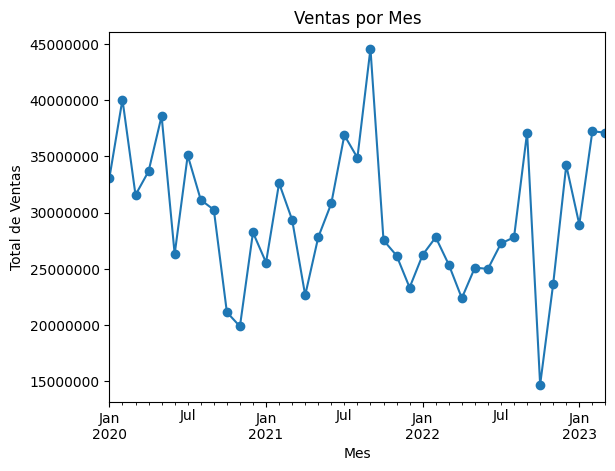

In [25]:
ventas_mes_tienda1.plot(
    kind='line',
    marker='o',
    title='Ventas por Mes'
)

plt.xlabel('Mes')
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Total de Ventas')
plt.show()

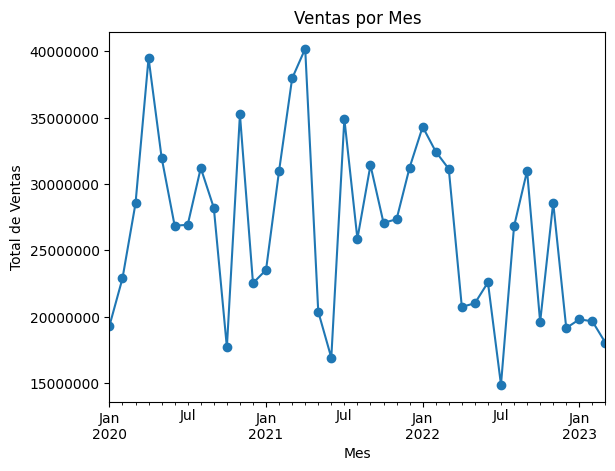

In [26]:
ventas_mes_tienda4.plot(
    kind='line',
    marker='o',
    title='Ventas por Mes'
)

plt.xlabel('Mes')
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Total de Ventas')
plt.show()

In [27]:
comparacion = pd.concat(
    [ventas_mes_tienda1, ventas_mes_tienda4],
    axis=1,
    keys=['Tienda 1','Tienda 4']
)
comparacion2 = pd.concat(
    [ventas_mes_tienda2, ventas_mes_tienda3],
    axis=1,
    keys=['Tienda 2','Tienda 3']
)

# **Graficos**

In [28]:
min_v = resumen_tiendas['Total Ventas'].min()
max_v = resumen_tiendas['Total Ventas'].max()

## **Total de Ventas**

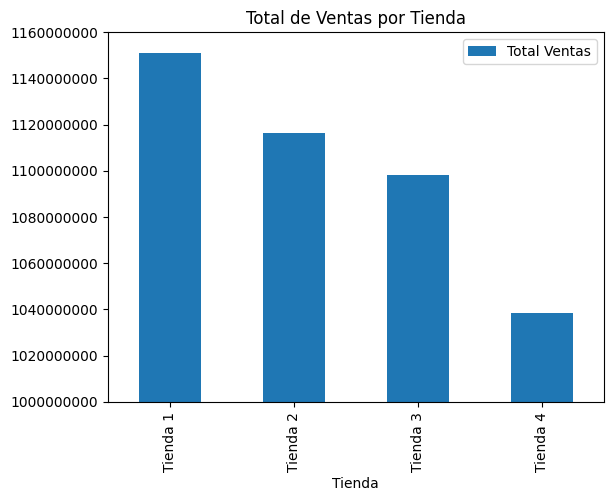

In [29]:

resumen_tiendas.plot(
    x='Tienda',
    y='Total Ventas',
    kind='bar',
    title='Total de Ventas por Tienda'
)
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(1e9, 1.16e9)
plt.show()

## **Grafico de Ventas En el tiempo**

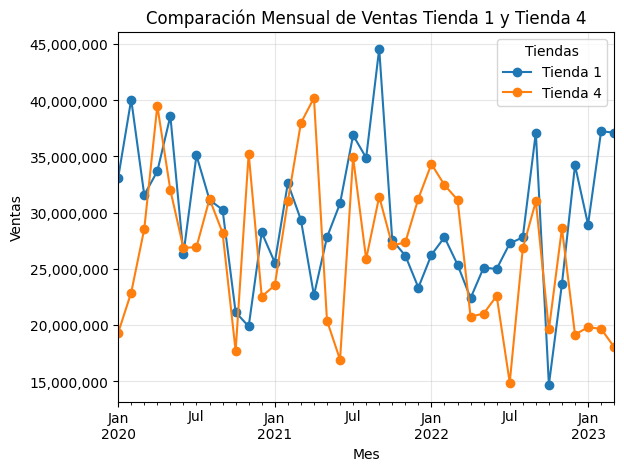

In [30]:
import matplotlib.ticker as mtick

ax = comparacion.plot(kind='line', marker='o')

ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.title('Comparación Mensual de Ventas Tienda 1 y Tienda 4')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.legend(title='Tiendas')

plt.grid(alpha=0.3)
plt.show()

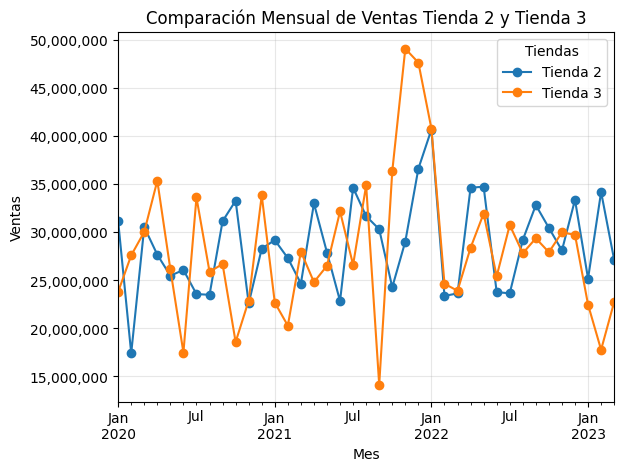

In [31]:
import matplotlib.ticker as mtick

ax = comparacion2.plot(kind='line', marker='o')

ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.title('Comparación Mensual de Ventas Tienda 2 y Tienda 3')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.legend(title='Tiendas')

plt.grid(alpha=0.3)
plt.show()

## **Relacion Calificacion Ventas**

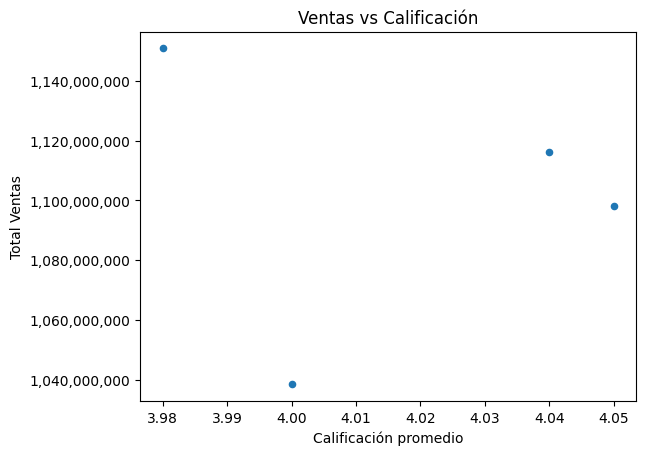

In [32]:
ventas_calificacion = resumen_tiendas.plot(
    kind='scatter',
    x='Calificación promedio',
    y='Total Ventas',
    title='Ventas vs Calificación')
ventas_calificacion.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

## **Envio Promedio**

<Axes: title={'center': 'Costo Promedio de Envío'}, xlabel='Tienda'>

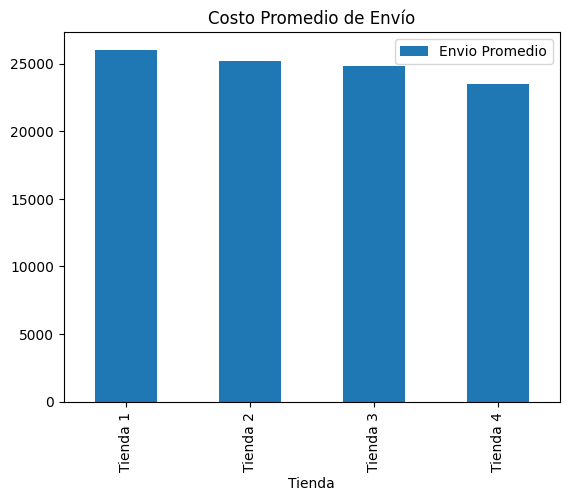

In [33]:
resumen_tiendas.plot(
    x='Tienda',
    y='Envio Promedio',
    kind='bar',
    title='Costo Promedio de Envío'
)

# **Informe final**

Después de todos los análisis y de recabar datos, puedo decir que la tienda que debe ser vendida es la Tienda 4.

Mi defensa se basa en varios puntos que se muestran en los gráficos anteriores y veré uno por uno:

Primer gráfico y más importante para esta defensa está el **Total de Ventas**, la Tienda 4 es por un amplio margen la que peores ganancias está generando en comparación con las otras, principalmente en comparación con tienda 1 donde se hallan más de 100,000,000 millones de diferencia en las ventas.

Mi segundo gráfico es que además de ser la que menos dinero genera, tampoco parece estar en proceso de crecimiento, pues como se puede ver en la comparación que tienen la Tienda 1 y la Tienda 4, gráficos de la sección Gráfico de Ventas En el tiempo, parece estar recibiendo menos compras conforme avanza el tiempo.

En el tercer gráfico quiero dejar en evidencia que aunque tenga mejores reseñas promedio, un poco mejores que la Tienda 1, no existe una relación real entre estas y las ventas. Tener en cuenta que aunque es importante tener en cuenta la conformidad del usuario, en este caso la diferencia es pequeña y no supuso mayor perjuicio.

Y con mi cuarto gráfico y último gráfico quiero mostrar que la ventaja más clara que presenta la Tienda 4, sus mejores costos de envío, no han representado ni una mejor calificación del cliente, pues la Tienda 3 y 2 la superan, ni en las compras en general.

En resumen queda claro que aunque la Tienda 4 tiene buen envío y buena calificación, no convierte eso en ingresos ni crecimiento. Por eso es la menos rentable a largo plazo.